## Filepaths

On windows you have to forward slash, on mac you have to backslash. A new module called **pathlib** makes this easier

In [1]:
import pathlib

In [2]:
path = pathlib.Path()

In [3]:
path

WindowsPath('.')

In [5]:
# The resolve method will find where the current directory is
# This should work for other operating systems also. No matter
# Where we run this, it will create the appropriate filepath
path.resolve()

WindowsPath('C:/Users/rajan/ctdot-tobin-yse/Learning')

In [9]:
# Check that the path exists
path.exists()

True

In [8]:
# Check that it is a directory
path.is_dir()

True

In [11]:
# We can combine it with another directory name underneaeth 
path2 = path.resolve() / "data"
path2

WindowsPath('C:/Users/rajan/ctdot-tobin-yse/Learning/data')

In [13]:
path2.parent

WindowsPath('C:/Users/rajan/ctdot-tobin-yse/Learning')

In [15]:
# We could store this filepath in a constant. Constants don't 
# exist in python, but we have a convention around capitalizing
# them
DATA_DIRECTORY = pathlib.Path().resolve() / "data"
DATA_DIRECTORY

WindowsPath('C:/Users/rajan/ctdot-tobin-yse/Learning/data')

## Geopandas Example with paths

In [16]:
import geopandas

# We can then use the pathlib path to access a file, e.g.
municipalities = geopandas.read_file(DATA_DIRECTORY.parent.parent / "data" / "us_roads")

<AxesSubplot:>

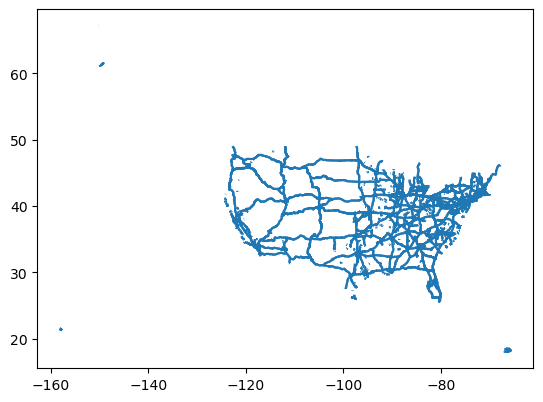

In [18]:
municipalities.plot()

## Vector input and output

A shapefile is a vector dataset format that was developed by ESRI. It does have some limitations - e.g. text attributes not longer than 255 characters. It is not just one file, it is up to seven files

**GeoPackage** Is a new standard, a vector file format container developed more recently and will be more widely adopted. We see more and more of these

**Cordinate Reference Systems** It is a mathematical function that relates a 3D point to a 2D point. It also defines the unit of measurement, usually optimized for a certain purpose.

**Datum:** Defines the center point, orientation, and scale of the reference surface related to a coordinate references systems. Foir example, WGS84 is a widely used global datum, while ETRS89 is a datum used in europe. 

**EPSG:** EPSG codes refer to specific refrence systems. They stand for European Petroleum Survey Group that originally published a database for spatial reference systems. For example, EPSG:3067 refers to a coordinate reference system commonly used in Finland.

In [22]:
# DATA FOR THE COURSE IS HERE
# https://github.com/Automating-GIS-processes/site/tree/main/docs/static/data

In [21]:
import fiona

# Print a list of support file packages - all the main ones are here
# The codes tell you if you can read, write, append
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [24]:
municipalities = geopandas.read_file(DATA_DIRECTORY / "finland_municipalities_2021.gpkg")

In [28]:
# Notice that there is a geometry column
# Inside it, there is a shapely geometry object
municipalities

,GML_ID,NATCODE,NAMEFIN,NAMESWE,LANDAREA,FRESHWAREA,SEAWAREA,TOTALAREA,geometry
0,1601000258,498,Muonio,Muonio,1904.05,133.73,0.00,2037.78,"POLYGON ((366703.026 7563861.713, 373641.706 7..."
1,1601000566,148,Inari,Enare,15056.29,2277.33,0.00,17333.62,"POLYGON ((554063.014 7746246.426, 558386.737 7..."
2,1601000428,224,Karkkila,Högfors,242.35,12.97,0.00,255.32,"POLYGON ((338515.195 6726577.401, 338539.595 6..."
3,1601000698,271,Kokemäki,Kumo,480.20,51.06,0.00,531.26,"POLYGON ((260519.503 6818726.479, 263236.792 6..."
4,1601000343,176,Juuka,Juuka,1501.70,344.87,0.00,1846.57,"POLYGON ((607203.808 7035838.978, 608878.941 7..."
...,...,...,...,...,...,...,...,...,...
304,1601000491,687,Rautavaara,Rautavaara,1150.64,84.61,0.00,1235.25,"POLYGON ((570334.147 7067322.876, 572235.875 7..."
305,1601000373,623,Puumala,Puumala,794.18,443.57,0.00,1237.75,"POLYGON ((562600.581 6842928.549, 562954.277 6..."
306,1601000653,778,Suonenjoki,Suonenjoki,713.56,148.78,0.00,862.34,"POLYGON ((498498.863 6965137.158, 499042.144 6..."
307,1601000632,583,Pelkosenniemi,Pelkosenniemi,1836.42,45.40,0.00,1881.82,"POLYGON ((518560.162 7473419.541, 519080.102 7..."


In [38]:
municipalities["geometry"][0].geom_type

'Polygon'

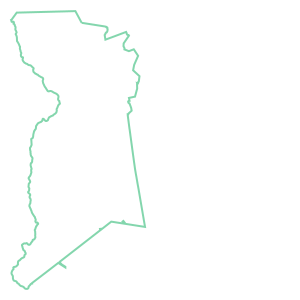

In [39]:
municipalities["geometry"][0].exterior

In [40]:
municipalities["geometry"][0].exterior.length

261627.90739178567

<AxesSubplot:>

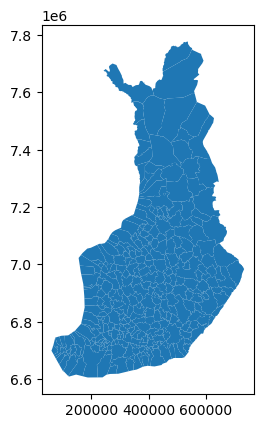

In [26]:
municipalities.plot()

In [41]:
# We can now save this locally
# Note that we can save to a different file type
municipalities.to_file(DATA_DIRECTORY / "saved_file.geojson")

### Databases
GeoPandas can also read and write to local or remote databases using PostGres, if needed

In [44]:
import os
os.listdir('./data')

['amazon_river',
 'europe_nuts_regions.geojson',
 'eu_countries',
 'finland_municipalities',
 'finland_municipalities_2021.gpkg',
 'finland_topographic_database',
 'helsinki_addresses',
 'helsinki_city_districts',
 'helsinki_municipality',
 'helsinki_region_travel_times_to_railway_station',
 'saved_file.geojson',
 'world_countries']

In [50]:
TOPOGRAPHIC_DATABASE = DATA_DIRECTORY / "finland_topographic_database"

In [54]:
# We produce a list
# Note the glob creates a generator / iterator item
# List then churns through and creates the output list
list(TOPOGRAPHIC_DATABASE.glob("m*p.shp"))

[WindowsPath('C:/Users/rajan/ctdot-tobin-yse/Learning/data/finland_topographic_database/m_L4132R_p.shp')]

In [66]:
input_file = list(TOPOGRAPHIC_DATABASE.glob("m*p.shp"))[0]
data = geopandas.read_file(input_file)

In [58]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [59]:
data.head()

,TEKSTI,RYHMA,LUOKKA,TASTAR,KORTAR,KORARV,KULKUTAPA,KOHDEOSO,AINLAHDE,SYNTYHETKI,...,TOLEFT,FROMRIGHT,TORIGHT,TIENIM2,TIENIM3,TIENIM4,TIENIM5,KUNTA_NRO,KUNTA,geometry
0,NaN,64,32421,5000,0,0.0,0,1812247077,1,20180125,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,NaN,64,32421,5000,0,0.0,0,1718796908,1,20180120,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,NaN,64,32421,20000,0,0.0,0,411167695,1,20180120,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,NaN,64,32421,20000,0,0.0,0,411173768,1,20180120,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,NaN,64,32421,20000,0,0.0,0,411173698,1,20180120,...,0,0,0,NaN,NaN,NaN,NaN,0,NaN,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [61]:
data.columns

Index(['TEKSTI', 'RYHMA', 'LUOKKA', 'TASTAR', 'KORTAR', 'KORARV', 'KULKUTAPA',
       'KOHDEOSO', 'AINLAHDE', 'SYNTYHETKI', 'KUOLHETKI', 'KARTOGLK',
       'ALUEJAKOON', 'VERSUH', 'SUUNTA', 'SIIRT_DX', 'SIIRT_DY', 'KORKEUS',
       'PYSYVAID', 'ATTR3', 'TIENUM', 'OSANUM', 'TIEOSA', 'PAALLY', 'YKSSUU',
       'VAPKOR', 'VALMAS', 'PITUUS', 'FROMLEFT', 'TOLEFT', 'FROMRIGHT',
       'TORIGHT', 'TIENIM2', 'TIENIM3', 'TIENIM4', 'TIENIM5', 'KUNTA_NRO',
       'KUNTA', 'geometry'],
      dtype='object')

<AxesSubplot:>

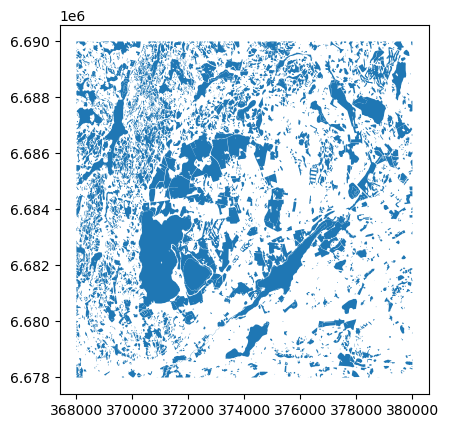

In [62]:
data.plot()

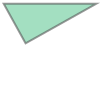

In [63]:
data["geometry"][0]

In [67]:
# We want to drop some of the columns and rename some of them
data = data[["RYHMA", "LUOKKA", "geometry"]]
data = data.rename(
    columns = {
    "RYHMA": "GROUP",
    "LUOKKA": "CLASS"})

In [68]:
data.head()

,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [74]:
data.shape

(4304, 3)

In [79]:
# Get the unique number of Classes
len(data["CLASS"].unique())

# Get the unique number of groups
len(data["GROUP"].unique())

1

In [81]:
# Do this more quickly
data["CLASS"].nunique()

21

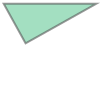

In [82]:
data.at[0, "geometry"]

In [90]:
area = data.at[10, "geometry"].area
print(f"The area of the 10th geometry object is {area:.01f}")

The area of the 10th geometry object is 2197.8


In [91]:
# We can also apply this to all rows
data.area

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4299     2651.800270
4300      376.503380
4301      413.942555
4302     3487.927677
4303     1278.963199
Length: 4304, dtype: float64

In [92]:
# And create a new column storing the area of each row
data["area"] = data.area
data.head()

,GROUP,CLASS,geometry,area
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6...",76.027392
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6...",2652.054186
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6...",3185.649995
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6...",13075.165279
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6...",3980.682621


In [102]:
# Calculate some descriptive statistics
# Thus the columns have a number of methods that can be called
# Also have sum() 
mean = data["area"].mean()
sd = data["area"].std()
maxi = data["area"].max()
print(f"Mean is {mean:.2f}, standard deviation is {sd:.2f}, max is {maxi:.2f}")

Mean is 11513.83, standard deviation is 78981.87, max is 4084558.15


### Grouping data
This is slightly different for a geo data frame

In [103]:
# We look at all the classes we have
data["CLASS"].unique()

array([32421, 32200, 34300, 34100, 34700, 32417, 32500, 32112, 32111,
       32611, 32612, 32800, 32900, 35300, 35412, 35411, 35421, 33000,
       33100, 36200, 36313], dtype=int64)

In [105]:
# Now we use groupby, and we supply a column name as a parameter
data_grouped = data.groupby("CLASS")
data_grouped

In [106]:
# This is of note - the object we create is a wrapper around the 
# Dataframe. It is a lookup table in the form of a dictionary

In [107]:
data_grouped.groups

{32111: [3116], 32112: [3115], 32200: [103, 104], 32417: [3112], 32421: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 32500: [3113, 3114], 32611: [3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201

In [109]:
for key, group in data_grouped:
    print(f"Terrain class {key} contains {len(group)} objects")

Terrain class 32111 contains 1 objects
Terrain class 32112 contains 1 objects
Terrain class 32200 contains 2 objects
Terrain class 32417 contains 1 objects
Terrain class 32421 contains 103 objects
Terrain class 32500 contains 2 objects
Terrain class 32611 contains 261 objects
Terrain class 32612 contains 11 objects
Terrain class 32800 contains 81 objects
Terrain class 32900 contains 26 objects
Terrain class 33000 contains 5 objects
Terrain class 33100 contains 117 objects
Terrain class 34100 contains 3003 objects
Terrain class 34300 contains 1 objects
Terrain class 34700 contains 3 objects
Terrain class 35300 contains 134 objects
Terrain class 35411 contains 34 objects
Terrain class 35412 contains 449 objects
Terrain class 35421 contains 5 objects
Terrain class 36200 contains 56 objects
Terrain class 36313 contains 8 objects


Writing different groups to separate files:

In [112]:
os.mkdir(DATA_DIRECTORY / "topology_outputs")

In [113]:
for key, group in data_grouped:
    new_file_path = DATA_DIRECTORY / "topology_outputs" / f"output_{key}.gpkg"
    new_dat = data_grouped.get_group(key)
    new_dat.to_file(new_file_path)

In [114]:
os.listdir(DATA_DIRECTORY / "topology_outputs")

['output_32111.gpkg',
 'output_32112.gpkg',
 'output_32200.gpkg',
 'output_32417.gpkg',
 'output_32421.gpkg',
 'output_32500.gpkg',
 'output_32611.gpkg',
 'output_32612.gpkg',
 'output_32800.gpkg',
 'output_32900.gpkg',
 'output_33000.gpkg',
 'output_33100.gpkg',
 'output_34100.gpkg',
 'output_34300.gpkg',
 'output_34700.gpkg',
 'output_35300.gpkg',
 'output_35411.gpkg',
 'output_35412.gpkg',
 'output_35421.gpkg',
 'output_36200.gpkg',
 'output_36313.gpkg']

In [116]:
# Test that this worked
test_newfile_worked = geopandas.read_file(DATA_DIRECTORY / "topology_outputs" / "output_32111.gpkg")
test_newfile_worked

,GROUP,CLASS,area,geometry
0,64,32111,1833.746786,"POLYGON ((372322.806 6686912.714, 372317.682 6..."


## Handling different coordinate systems in GeoPandas

In [118]:
eu_countries = geopandas.read_file(
    DATA_DIRECTORY / "eu_countries" / "eu_countries_2022.gpkg"
)

In [120]:
# Return the coordinate reference system used for this geo data frame
eu_countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

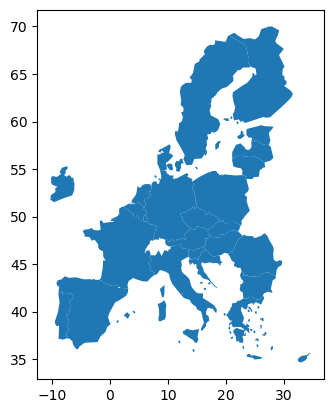

In [122]:
eu_countries.plot()

<AxesSubplot:>

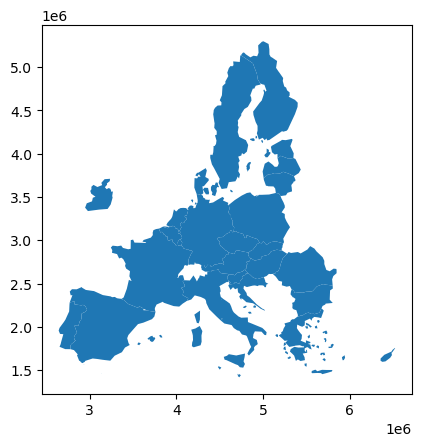

In [124]:
# Reprojecting
# Below the hood, this uses the pyproj library
eu_countries_reprojected = eu_countries.to_crs("EPSG:3035")
eu_countries_reprojected.plot()

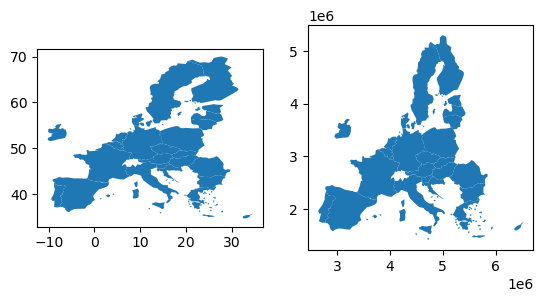

In [128]:
# Plot these next to each other
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols =2)
eu_countries.plot(ax = ax1)
ax1.set_aspect(1)
eu_countries_reprojected.plot(ax=ax2)
ax2.set_aspect(1)